Lecture 16 - Normal distributions, central limit theorem, cdfs
---------

CS 2810, Spring 2022, 3/21/2022, Muzny

We recommend downloading this notebook and then uploading it to [Google Colaboratory](https://colab.research.google.com/).

We'll upload finalized html/ipynb versions of this notebook after lecture.

In [22]:
# for the pi, e, sqrt functions
import math

# for our coin flips
import random

# for our normal distribution functions
from scipy.stats import norm

# for graphing (optional)
import matplotlib.pyplot as plt

# for the linspace function (optional)
import numpy as np

In [23]:
# check your calculation for the pdf value 
# of a normal distribution here

x = 5.11
mean = 5
stddev = 2

# do the math "by hand" first:
print( 1 / 2) # to divide
print( 2 ** 3) # ** is the exponent operator
print(math.e) # the e constant
print(math.pi) # give you the value of pi
# carful of order of operations!
pdf_val = (1 / (stddev * math.sqrt((2 * math.pi)))) * math.e ** (-0.5 * ((x - mean) / stddev) ** 2)
print(pdf_val)

# then, run the code:
# verify our pdf calculations using scipy
print("from scipy", norm.pdf(x, mean, stddev))

0.5
8
2.718281828459045
3.141592653589793
0.1991696681468755
from scipy 0.19916966814687553


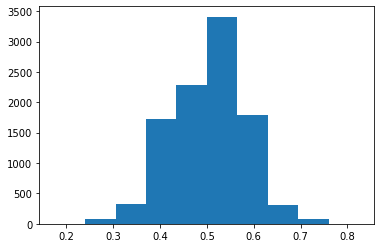

In [24]:
# central limit theorem example
def flip_coin(times):
    """
    Function that generates a list of fair two-sided coin flips.
    Parameters:
    times (int): number of times to flip the coin
    Return:
    list of values from the coin flips
    """
    return [random.randint(0, 1) for t in range(times)]


# fill in numbers here
# number of samples to take
samples = 10000
# flips per sample
times = 40

# accumulate a list of the average value of each sample
averages = []
# repeat for samples times
for sample_num in range(samples):
    # flip the coins
    coin_flips = flip_coin(times)
    # calculate the average
    averages.append(sum(coin_flips) / len(coin_flips))
    
# display a histogram of the averages
plt.hist(averages)
plt.show()

In [25]:
# if I wanted to apply the central limit theorem to people's heights, what are samples and times?
# samples: groups of people, chosen with replacement
# times: asking each person in a given group (sample) how tall they are

# we will do this sufficient number of times to get a good estimate of 
# our population mean (this is a mean of means)
# law of large numbers :)

In [26]:
# using sci py to access the cdf of a distribution:
# norm.cdf(x, mean, stddev)
print(x)
print(mean)
print(stddev)

# what percent is <= 5?
print(norm.cdf(5, mean, stddev))

# what percent is between 3 and 5?
print(norm.cdf(3, mean, stddev))
print(norm.cdf(5, mean, stddev) - norm.cdf(3, mean, stddev))

5.11
5
2
0.5
0.15865525393145707
0.3413447460685429


In [27]:
# using sci py to access the ppf of a distribution:
# norm.ppf(percentage, mean, stddev)

print(norm.ppf(.1, mean, stddev))
print(norm.cdf(2.4369, mean, stddev))


2.4368968689107993
0.10000027475074158


In [28]:
# ICA question 4
# bottom 10 % of travel times
print(norm.ppf(.1, mean, stddev))

# % trips between 5 and 8 minutes
print(norm.cdf(8, mean, stddev) - norm.cdf(5, mean, stddev))

2.4368968689107993
0.4331927987311419


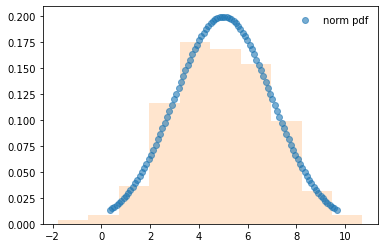

In [29]:
# example adapted from:
# https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/generated/scipy.stats.norm.html

# we're plotting the calculated pdf in combination with
# the histogram generated from sampling a normally distributed 
# random variable with the same mean and standard deviation 
# that we've been working with
fig, ax = plt.subplots(1, 1)
xs = np.linspace(norm.ppf(0.01, mean, stddev),
                norm.ppf(0.99, mean, stddev), 100)
ax.plot(xs, norm.pdf(xs, mean, stddev),
       'o', lw=5, alpha=0.6, label='norm pdf')
r = norm.rvs(mean, stddev,size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()